In [22]:
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

import statistics as st

# Практическое задание 1
## Вариант 1

## Задание 1 

Предположим X и Y две случайные переменные, отражающие возраст и рост, соответственно. Рассмотрим случайную выборку из 20 наблюдений:

*X = (73, 67, 103, 65, 48, 63, 33, 9, 56, 61, 48, 113, 78, 70, 41, 65, 34, 60, 54, 107)*  
*Y = (173, 237, 154, 144, 140, 195, 168, 182, 191, 133, 174, 151, 198, 125, 179, 176, 189, 205, 182, 184)*

Необходимо:  

	A. Найти среднее, медиану и моду величины X  
	B. Найти дисперсию Y  
	C. Построить график нормального распределения для X  
	D. Найти вероятность того, что возраст больше 65  
	E. Найти двумерное мат. ожидания и ковариационную матрицу для этих двух величин  
	F. Определить корреляцию между X и Y  
	G. Построить диаграмму рассеяния, отображающая зависимость между возрастом и ростом.  

### Данные

In [21]:
X = np.array([73,  67,  103, 65,  48,  63,  33,  9,   56,  61,  48,  113, 78,  70,  41,  65,  34,  60,  54,  107])
Y = np.array([173, 237, 154, 144, 140, 195, 168, 182, 191, 133, 174, 151, 198, 125, 179, 176, 189, 205, 182, 184])

### Пункт A

In [23]:
Xmean = X.mean()
print("Среднее для величины X:", Xmean,
      "\nМедиана для величины X:", np.median(X),
      "\nМода для величины X:", st.mode(X))

Среднее для величины X: 62.4 
Медиана для величины X: 62.0 
Мода для величины X: 65


### Пункт B

In [19]:
print("Дисперсия для величины Y:", Y.var())

Дисперсия для величины Y: 691.1


### Пункт C

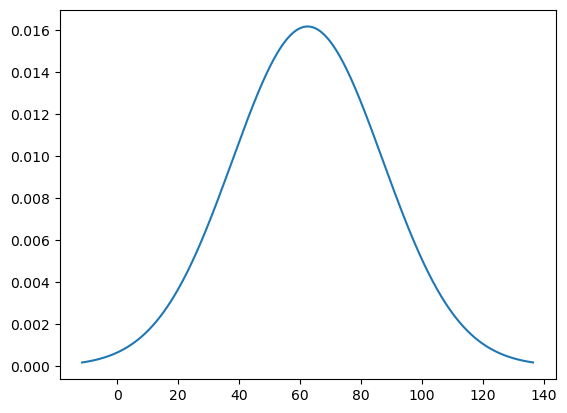

In [32]:
# СКО для генерации иксов для графика
Xstd = X.std()

#Генерация значения иксов для графика
Xt = np.linspace(Xmean - 3 * Xstd, Xmean + 3 * Xstd, 500)

#Генерация значений графика плотности нормального распределения по уже сген. иксами
F = stats.norm.pdf(Xt, Xmean, Xstd)

#Вывод графика
plt.plot(Xt, F);

### Пункт D

In [44]:
# Выбираем людей, которым больше 65
Xtrue = [i for i in X if i > 65]
print("Вероятность того, что возраст больше 65:", len(Xtrue) / len(X))

Вероятность того, что возраст больше 65: 0.35


### Пункт E

In [54]:
# Соединение двух масивов данных
XY = np.stack([X, Y])
cov = np.cov(XY)
print("Ковариационная матрица:\n", cov)

print("Двумерное мат. ожидания:\n", np.mean(XY, axis=1))


Ковариационная матрица:
 [[640.04210526  95.05263158]
 [ 95.05263158 727.47368421]]
Двумерное мат. ожидания:
 [ 62.4 174. ]


### Пункт F

In [102]:
print("Корреляция между X и Y:", np.corrcoef(X,Y)[0, 1])

Корреляция между X и Y: 0.13930003599968438


### Пункт G

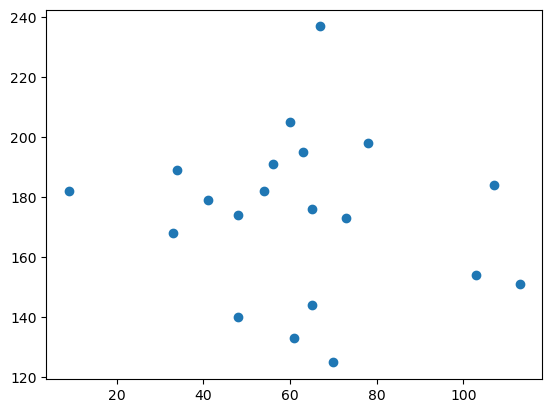

In [33]:
# Вывод диаграммы рассивания
plt.scatter(X,Y);

## Задание 2
Для следующего набора данных

|       | **X<sub>1</sub>** | **X<sub>2</sub>** | **X<sub>3</sub>** |
| :---: | :---------------: | :---------------: | :---------------: |
| **a** |        47         |        44        |        35         |
| **b** |        96         |        55         |        6        |
| **c** |        2        |        3        |        3        |

рассчитайте ковариационную матрицу и обобщенную дисперсию.

### Данные

In [59]:
matr = np.array([(47, 44, 35),
                 (96, 55, 6),
                 (2 , 3,  3)])

### Задание

In [103]:
print("Ковариационная матрица:\n", np.cov(matr))

print("Обобщенная дисперсия:", np.linalg.det(np.cov(matr)))

Ковариационная матрица:
 [[ 3.90000000e+01  2.74000000e+02 -2.50000000e+00]
 [ 2.74000000e+02  2.03033333e+03 -2.18333333e+01]
 [-2.50000000e+00 -2.18333333e+01  3.33333333e-01]]
Обобщенная дисперсия: -2.2798429810677564e-13


## Задание 3
Даны два одномерных нормальных распределения N<sub>a</sub> и N<sub>b</sub> с мат. ожиданиями 3, 7 и СКО 4, 3 соответственно.

    A. Для каждого из значения {4, 6} определите, какое из распределений сгенерировало значение с большей вероятностью.  
	B. Найди значение, которой могло быть сгенерировано обеими распределениями с равной вероятностью.

### Данные

In [72]:
m = [3, 7]
std = [4, 3]

### Пункт A

In [73]:
# Данные задачи
x_d = [4, 6]

# Инициализация
y = [0, 0]

# Цикл по исходным данным
for i, x_temp in enumerate(x_d):
    # Значение для Na
    y[0] = stats.norm.pdf(x_temp, m[0], std[0])
    # Значение для Nb 
    y[1] = stats.norm.pdf(x_temp, m[1], std[1])
    if y[0] > y[1]:
        print("Распределение Na сгенерировало значение", x_d[i], "с большей вероятностью")
        print(y[0], ">", y[1])
    elif y[0] < y[1]:
        print("Распределение Nb сгенерировало значение", x_d[i], "с большей вероятностью")
        print(y[0], "<", y[1])
    else:
        print("Распределения Na и Nb сгенерировали значение ", x_d[i], "с равной вероятностью")
        print(y[0], "=", y[1])

Распределение Na сгенерировало значение 4 с большей вероятностью
0.09666702920071232 > 0.08065690817304778
Распределение Nb сгенерировало значение 6 с большей вероятностью
0.07528435803870111 < 0.12579440923099774


### Пункт B

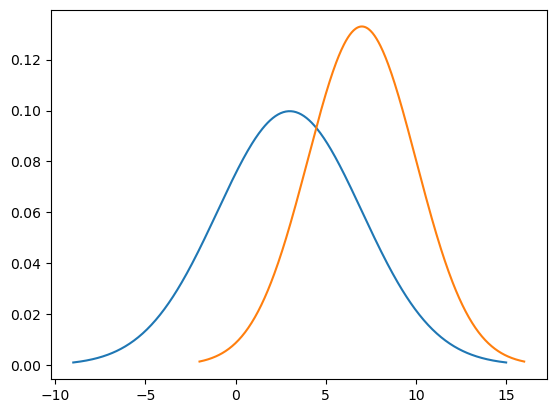

In [78]:
#Генерация значения иксов для Na
Xa = np.linspace(m[0] - 3 * std[0], m[0] + 3 * std[0], 500)
#Генерация значения иксов для Nb
Xb = np.linspace(m[1] - 3 * std[1], m[1] + 3 * std[1], 500)

#Генерация значений графика плотности нормального распределения по уже сген. иксами для Na
Na = stats.norm.pdf(Xa, m[0], std[0])

#Генерация значений графика плотности нормального распределения по уже сген. иксами для Nb
Nb = stats.norm.pdf(Xb, m[1], std[1])

#Вывод графика Na
plt.plot(Xa, Na);
#Вывод графика Nb
plt.plot(Xb, Nb);


In [97]:
# Поскольку точка лежит между 4 и 5 (видно на графике) генерируем значения иксов между 4 и 5
X_t = np.linspace(4, 5, 10000)

# Генерация значений графика плотности нормального распределения по уже сген. иксами для Na
Na_t = stats.norm.pdf(X_t, m[0], std[0])

# Генерация значений графика плотности нормального распределения по уже сген. иксами для Nb
Nb_t = stats.norm.pdf(X_t, m[1], std[1])
# Вычисление разности между значенями
dif = Na_t - Nb_t
# Индекс для самого минимального значения
index = 0
# цикл для нахождения индекса
for i in range(1, len(dif)):
    if abs(dif[i]) < abs(dif[index]):
        index = i
print("Примерное значение, "
      "которой могло быть сгенерировано обеими распределениями с равной вероятностью:", X_t[index])

Примерное значение, которой могло быть сгенерировано обеими распределениями с равной вероятностью: 4.471047104710471
